In [69]:
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [70]:
path= "Clean_CSV.csv"
social_data= pd.read_csv(path)
social_data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


In [71]:
# Define colors for each emotion
emotion_colors = {
    'Anger': 'red',
    'Happiness': 'yellow',
    'Neutral': 'grey',
    'Anxiety': 'orange',
    'Boredom': 'green',
    'Sadness': 'blue'
}

### Question 1
* Analysis for Gender vs Emotional Well bing


In [72]:
# 1 Gender vs Emotional Well being

ques_1 = social_data[["Gender", "Dominant_Emotion"]].copy()
ques_1.head()

,Gender,Dominant_Emotion
0,Female,Happiness
1,Male,Anger
2,Non-binary,Neutral
3,Female,Anxiety
4,Male,Boredom


In [73]:
ques_1["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

In [74]:
ques_1["Gender"].value_counts()

Gender
Female        344
Male          332
Non-binary    248
Name: count, dtype: int64

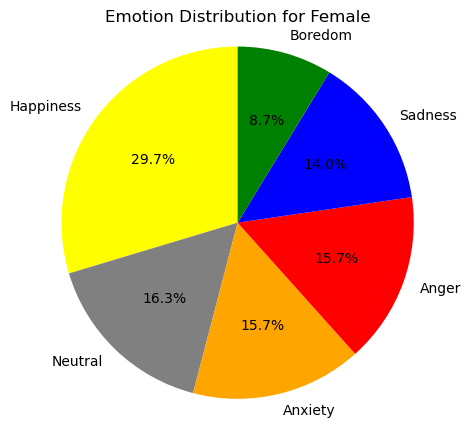

In [75]:
# Create a pie chart for each gender

# Female
female_data = ques_1[ques_1['Gender'] == 'Female']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
    female_data, 
    labels=female_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in female_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Female')
plt.axis('equal')
plt.show()



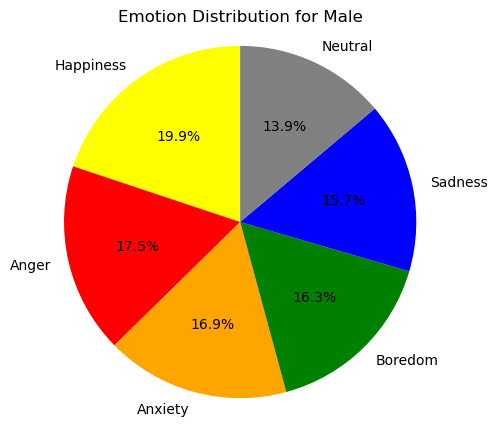

In [76]:
# Male
male_data = ques_1[ques_1['Gender'] == 'Male']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
    male_data, 
    labels=male_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in male_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Male')
plt.axis('equal')
plt.show()


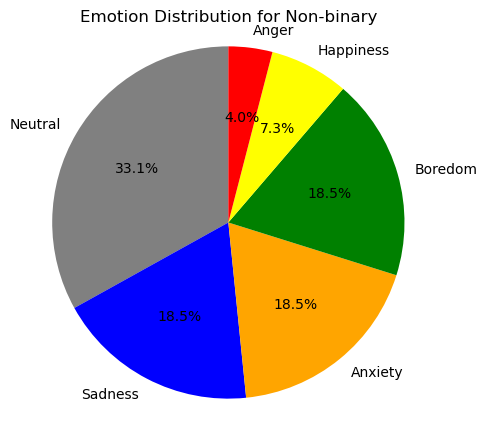

In [77]:
# Non-binary
nonbinary_data = ques_1[ques_1['Gender'] == 'Non-binary']['Dominant_Emotion'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
    nonbinary_data, 
    labels=nonbinary_data.index, 
    colors=[emotion_colors.get(emotion, 'grey') for emotion in nonbinary_data.index], 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Emotion Distribution for Non-binary')
plt.axis('equal')
plt.show()

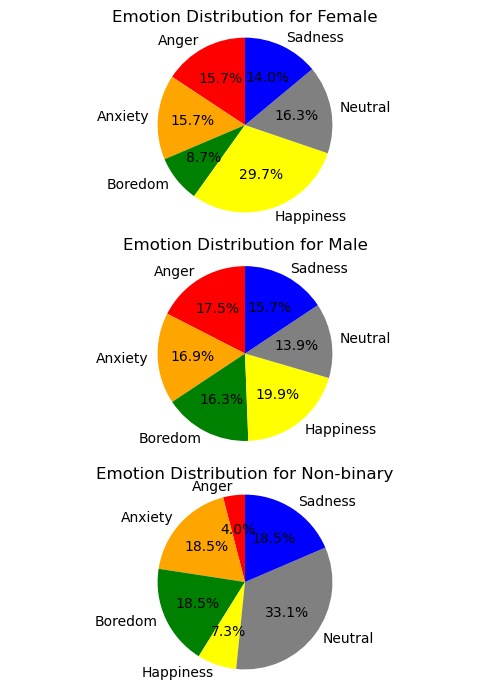

In [78]:
# Pie chart image with all 3 genders :) 

#  Create a contingency table for Gender and Dominant Emotion
contingency_table = pd.crosstab(social_data['Dominant_Emotion'], social_data['Gender'])

# Plot a pie chart for the distribution of emotions for each gender
plt.figure(figsize=(5, 7))  # Adjusting the figure size for vertical layout

# Plotting the pie chart for each gender's emotion distribution
for idx, gender in enumerate(contingency_table.columns):
    plt.subplot(len(contingency_table.columns), 1, idx + 1)  # Adjusting subplot for vertical layout
    
    # Extract counts for each emotion and corresponding colors
    sizes = contingency_table[gender]
    labels = contingency_table.index
    colors = [emotion_colors.get(emotion, 'grey') for emotion in labels]  # Use defined colors or default to grey

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Emotion Distribution for {gender}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.savefig("../Images/jennifers_images/GendervsEmotions.png")
plt.show()

### Question 8
* Analysis for Age vs Minutes Spent vs Well being

In [79]:
# 8 Age vs Minutes Spent vs Well being
ques_8 = social_data[["Age","Daily_Usage_Time (minutes)","Dominant_Emotion"]].copy()
ques_8.head()

,Age,Daily_Usage_Time (minutes),Dominant_Emotion
0,25,120,Happiness
1,30,90,Anger
2,22,60,Neutral
3,28,200,Anxiety
4,33,45,Boredom


In [80]:
age_max= social_data["Age"].max()
print("This is the Age max", age_max)
age_min= social_data["Age"].min()
print("This is the Age min", age_min)
age_average = social_data["Age"].mean()
print("This is the average Age", age_average)
age_count= social_data["Age"].value_counts()
print("These are the value count of each Age group:", age_count)


This is the Age max 35
This is the Age min 21
This is the average Age 27.5
These are the value count of each Age group: Age
28    92
27    92
29    90
22    74
26    66
25    64
24    64
31    62
33    56
21    56
30    48
23    48
35    38
32    38
34    36
Name: count, dtype: int64


In [81]:
ques_8["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

In [82]:
# Mapping emotions to colors using the pre-defined emotion_colors
# created a new column that contains the colors that will be used to color the scatter plot points
# based on the emotion associated with each row
ques_8['Emotion_Color'] = ques_8['Dominant_Emotion'].map(emotion_colors)


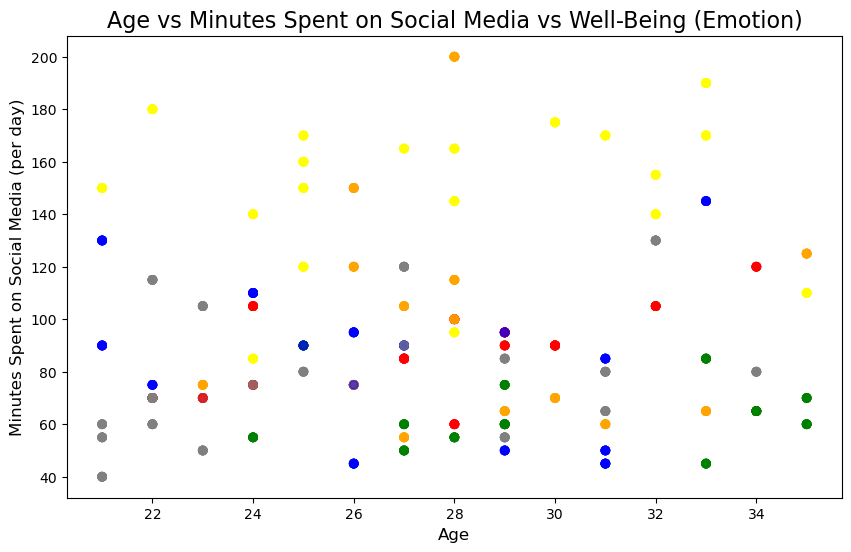

In [83]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ques_8['Age'], ques_8['Daily_Usage_Time (minutes)'], 
            c=ques_8['Emotion_Color'], alpha=0.6)

# Set plot title and labels
plt.title('Age vs Minutes Spent on Social Media vs Well-Being (Emotion)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent on Social Media (per day)', fontsize=12)

# Show the plot
plt.show()

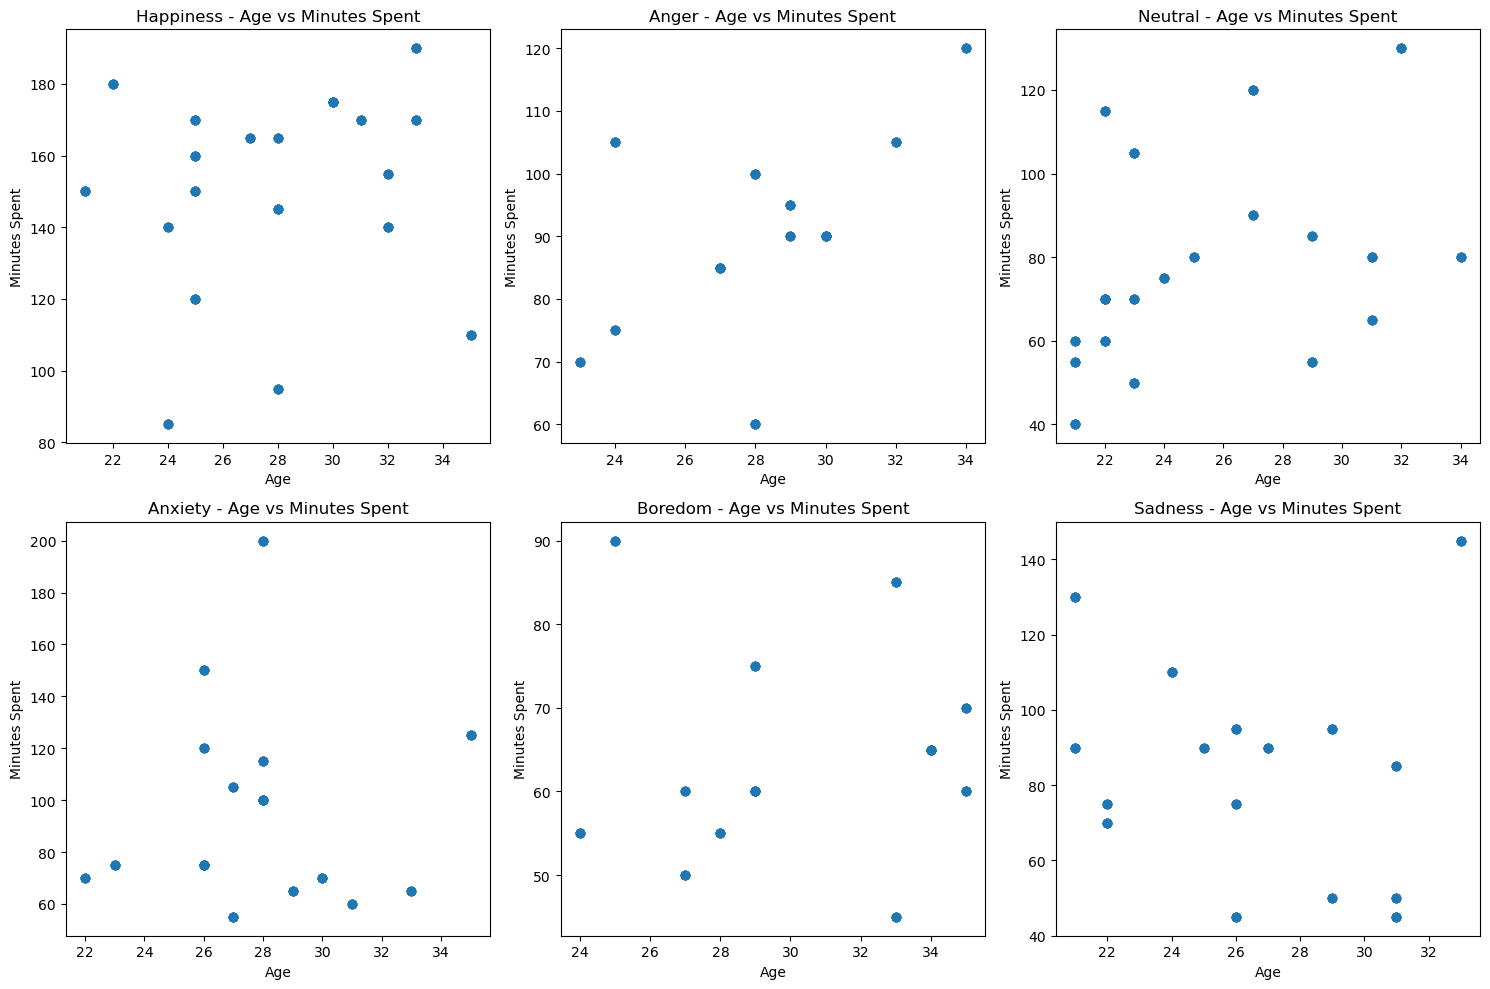

In [84]:
# Set up the figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust grid size based on emotions
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot data for each emotion
for idx, emotion in enumerate(social_data['Dominant_Emotion'].unique()):
    ax = axes[idx]
    
    # Filter data for the specific emotion
    emotion_data = social_data[social_data['Dominant_Emotion'] == emotion]
    
    # Plot for Age vs Minutes Spent
    ax.scatter(emotion_data['Age'], emotion_data['Daily_Usage_Time (minutes)'], alpha=0.6)
    
    # Set titles and labels
    ax.set_title(f'{emotion} - Age vs Minutes Spent', fontsize=12)
    ax.set_xlabel('Age')
    ax.set_ylabel('Minutes Spent')
    
plt.tight_layout()
plt.show()

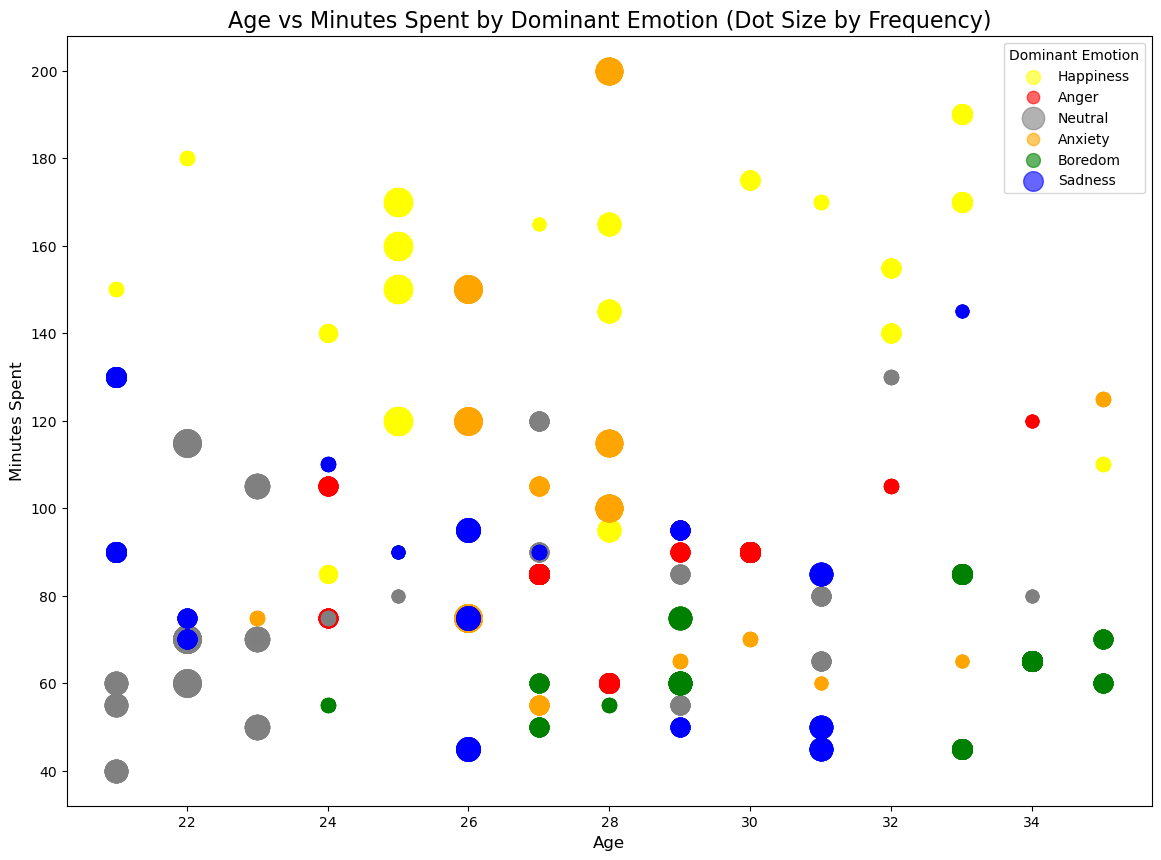

In [85]:
# Set up the figure for the plot
plt.figure(figsize=(14, 10))

# Group data by Age and Dominant Emotion to count occurrences (using ques_8)
emotion_counts = ques_8.groupby(['Age', 'Dominant_Emotion']).size().reset_index(name='count')

# Plot data for each emotion with specified colors and dot size based on the count of each emotion in each age group
for emotion in ques_8['Dominant_Emotion'].unique():
    # Filter data for the specific emotion and create a copy of the DataFrame to avoid the SettingWithCopyWarning
    emotion_data = emotion_counts[emotion_counts['Dominant_Emotion'] == emotion].copy()
    
    # Adjust the dot size based on the count of each emotion within each age group
    size_factor = 10  # Adjust this factor to make the sizes more readable
    emotion_data['dot_size'] = emotion_data['count'] * size_factor  # Safely assign dot_size
    
    # Plot for Age vs Minutes Spent with color mapped to emotion and size based on count
    for idx, row in emotion_data.iterrows():
        # Filter the original ques_8 for the age group and emotion combination
        age_data = ques_8[(ques_8['Age'] == row['Age']) & (ques_8['Dominant_Emotion'] == emotion)]
        
        # Plot each group with the correct color and size
        plt.scatter(age_data['Age'], age_data['Daily_Usage_Time (minutes)'],
                    color=emotion_colors.get(emotion, 'grey'),  # Default to grey if emotion is not in the dictionary
                    s=row['dot_size'],  # Set the size of each dot based on the count
                    label=emotion if idx == emotion_data.index[0] else "", alpha=0.6)

# Set titles and labels
plt.title('Age vs Minutes Spent by Dominant Emotion (Dot Size by Frequency)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Minutes Spent', fontsize=12)

# Add a legend to differentiate the emotions
plt.legend(title="Dominant Emotion", loc='upper right')

# Show the plot
plt.savefig("../Images/jennifers_images/AgeTimeEmotions.png")
plt.show()


In [86]:
# I got an error when i did this code without using iloc 
#.loc[] is the recommended way to access and modify DataFrame rows and columns to avoid unexpected behavior. 
# It ensures that you're modifying the DataFrame directly and avoids ambiguity when working with subsets or views.

In [87]:
# neutral is the biggest dot so you can see that social media is mostly used at mindless scrolling during bed rotting. 

In [88]:
# I did this third scatter plot graph since I want to make all the dots different sizes to show which emotion has the highest count or lowest count 

### Question 11
* Analysis for Platform vs emotional well being

In [89]:
# 11 Platform vs emotional well being
ques_11 = social_data[["Platform", "Dominant_Emotion"]].copy()
ques_11

,Platform,Dominant_Emotion
0,Instagram,Happiness
1,Twitter,Anger
2,Facebook,Neutral
3,Instagram,Anxiety
4,LinkedIn,Boredom
...,...,...
919,Twitter,Boredom
920,Facebook,Neutral
921,Whatsapp,Happiness
922,Telegram,Anger


In [90]:
ques_11["Platform"].value_counts()


Platform
Instagram    236
Twitter      188
Facebook     178
LinkedIn     118
Whatsapp      68
Telegram      68
Snapchat      68
Name: count, dtype: int64

In [91]:
ques_11["Dominant_Emotion"].value_counts()

Dominant_Emotion
Happiness    186
Neutral      184
Anxiety      156
Sadness      146
Boredom      130
Anger        122
Name: count, dtype: int64

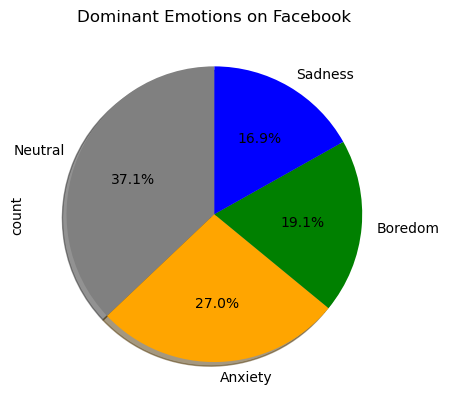

In [92]:
# Group data by Platform and Dominant Emotion and count the occurrences
emotion_plateform = ques_11.groupby("Platform")["Dominant_Emotion"].value_counts()

# Extract emotion counts for Facebook
facebook_emotion_counts = emotion_plateform["Facebook"]

# Map emotions to colors based on the predefined emotion_colors
colors = [emotion_colors.get(emotion, 'grey') for emotion in facebook_emotion_counts.index]

# Plot the pie chart with the emotion_colors applied
facebook_emotion_counts.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)

# Set a title for the plot
plt.title('Dominant Emotions on Facebook')

# Show the plot
plt.show()


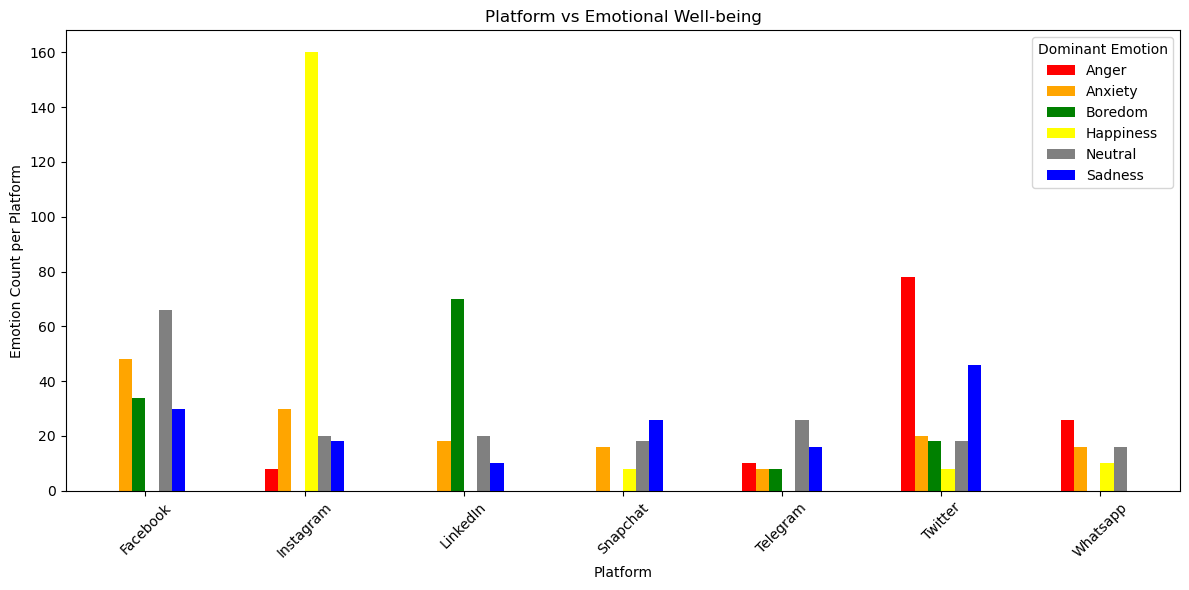

In [93]:


# Group data and pivot to get a count of each emotion for each platform
platform_emotion_counts = ques_11.groupby(['Platform', 'Dominant_Emotion']).size().unstack(fill_value=0)

# Generate a list of colors in the order of the emotions
colors = [emotion_colors[emotion] for emotion in platform_emotion_counts.columns]

# Plot the data as a grouped bar chart with custom colors
platform_emotion_counts.plot(kind='bar', figsize=(12, 6), color=colors)

# Add titles and labels
plt.title('Platform vs Emotional Well-being')
plt.xlabel('Platform')
plt.ylabel('Emotion Count per Platform')
plt.legend(title='Dominant Emotion', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../Images/jennifers_images/barchartPlatformEmotions.png")
plt.show()



In [94]:
# Verify columns in social_data and platform_emotion_counts
print(ques_11.columns)

# Re-create platform_emotion_counts to ensure it has the necessary columns
platform_emotion_counts = ques_11.groupby(['Platform', 'Dominant_Emotion']).size().reset_index(name='Count')
print(platform_emotion_counts.head())

Index(['Platform', 'Dominant_Emotion'], dtype='object')
    Platform Dominant_Emotion  Count
0   Facebook          Anxiety     48
1   Facebook          Boredom     34
2   Facebook          Neutral     66
3   Facebook          Sadness     30
4  Instagram            Anger      8


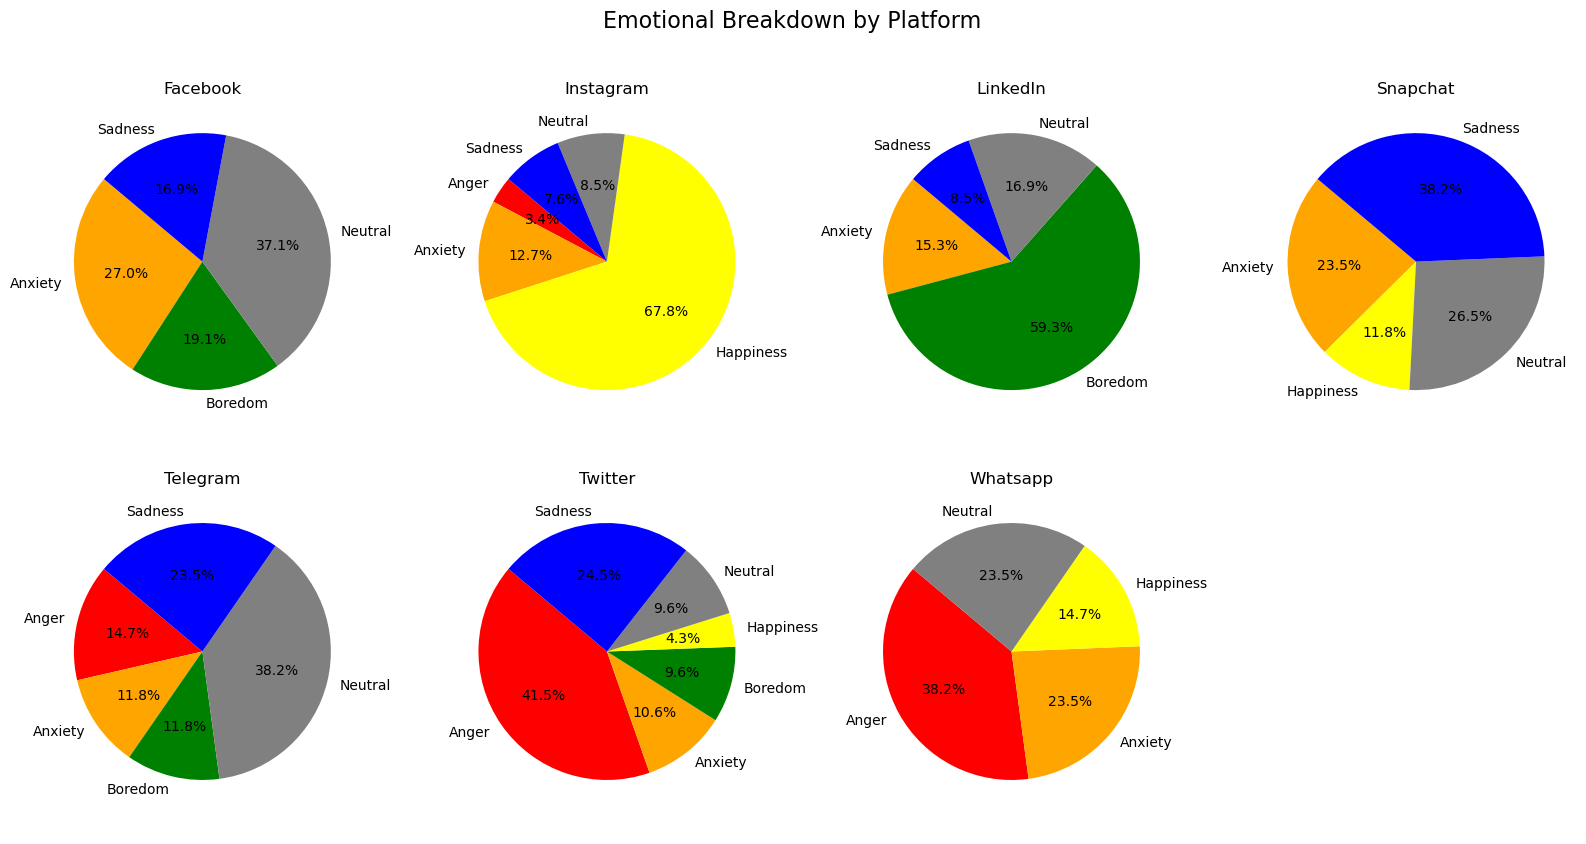

In [95]:
# Create a pie chart for each platform's emotional breakdown
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns
axes = axes.flatten()

# Iterate through platforms and plot them
for idx, platform in enumerate(platform_emotion_counts['Platform'].unique()):
    platform_data = platform_emotion_counts[platform_emotion_counts['Platform'] == platform]
    
    sizes = platform_data['Count']
    labels = platform_data['Dominant_Emotion']
    colors = [emotion_colors.get(emotion, 'grey') for emotion in labels]  # Default to grey if emotion is not in the color dictionary

    axes[idx].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[idx].set_title(f'{platform}')

# Hide the extra subplot (last one)
axes[-1].axis('off')

# Adjust layout to remove extra space and avoid overlap
plt.tight_layout()
plt.suptitle('Emotional Breakdown by Platform', fontsize=16, y=1.05)
plt.savefig("../Images/jennifers_images/PiePlatformEmotions.png")
plt.show()
